In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

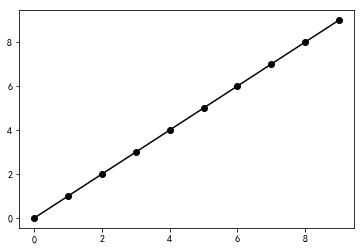

In [4]:
plt.plot(np.arange(10),'ko-')

# figure 和subplot

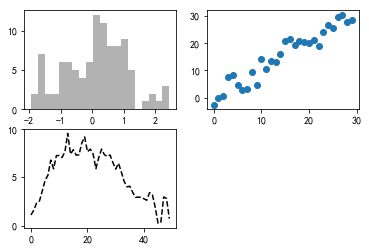

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# matplotlib 会在最后一个subplot上画
plt.plot(np.random.randn(50).cumsum(),'k--')  # ‘k--’线型选项，灰色虚线
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3) # 直方图
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))  # 散点图

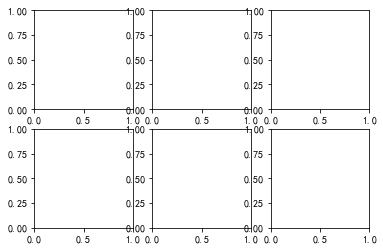

In [12]:
# 创建一个新的Figure，并返回一个含有已创建的subplot对象的numpy数组
fig,axes = plt.subplots(2,3) # 创建一个2行，3列的图


## 调整subplot周围的间距

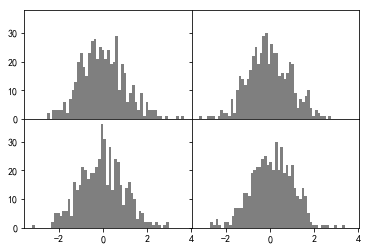

In [13]:

## subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
## wspace和hspace用于控制宽度和高度的百分比，用作subplot之间的间距
fig,axes = plt.subplots(2,2,sharex=True,sharey=True) # sharex和sharey指定subplot应该具有相同的x轴和y轴
for i  in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)  # 间距为0，发现轴标签重叠了

# 颜色、标记和线型

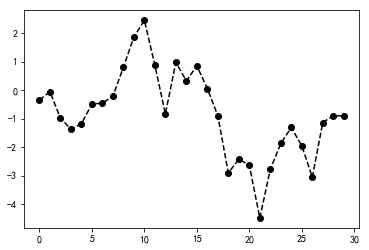

In [14]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

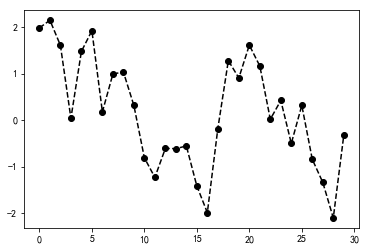

In [15]:
# 和上面的表达一样，这个更明确
plt.plot(np.random.randn(30).cumsum(),color='k',linestyle='--',marker='o')

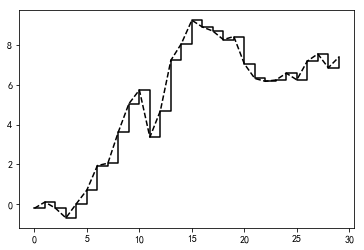

In [18]:
# 在线型图中，非实际数据点默认是按线性方式插值的，可以通过drawstyle选项修改
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')

# 刻度  标签 和  图例

In [ ]:
# 对当前或最近创建的AxesSubplot起作用
# xlim:x轴的绘图范围，
    # 如果调用时不带参数，如plt.xlim()则返回当前的X轴的绘图范围
    # 如果调用时带参数，则设置参数值，如plt.xlime([0,10])会将X轴的范围设置为0-10
# xticks:刻度位置
# xticklabels：刻度标签

# 针对各自对应的subplot对象 用ax.get_xlim()  ax.set_xlim()

Text(0.5,0,'Stage')

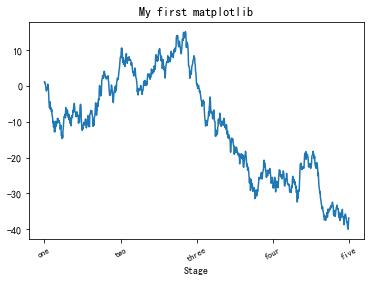

In [20]:
# 设置标题、轴标签、刻度 以及 刻度标签
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])# 要将刻度放在数据范围汇总的哪些位置，默认 这些位置也就是刻度标签
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small') # 将任何其他值用作标签
ax.set_title('My first matplotlib')
ax.set_xlabel('Stage')# 为X轴设置一个名称

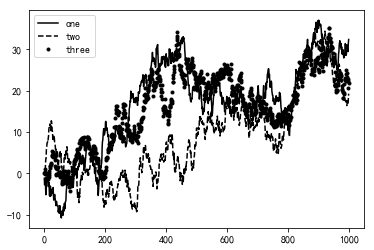

In [31]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
# ax.legend() 或plt.legend()来自动创建图例
ax.legend(loc='best')  # loc是要将图例放在哪，一般选best，放在不碍事的位置

(600, 1800)

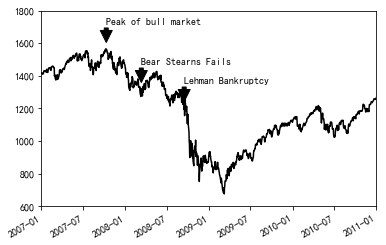

In [35]:
# 注解以及在subplot上绘图
# text：将文本绘制在图表的指定坐标（x,y）
# arrow:箭头
# annotate:自定义格式

# 对标准普尔500指数收盘价格绘制一张曲线图
import os
from datetime import datetime
path =str(os.getcwd()).replace('\\','/')
filename = path +'/datasets/ch08_data/spx.csv'
data = pd.read_csv(filename,engine='python',index_col=0,parse_dates=True) # 第0列做行索引，parse_dates=True解析索引作为日期列使用
spx=data['SPX']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
spx.plot(ax=ax,style='k-')

crisis_data = [(datetime(2007,10,11),'Peak of bull market'),
               (datetime(2008,3,12),'Bear Stearns Fails'),
               (datetime(2008,9,15),'Lehman Bankruptcy')]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+50),# label:注释文本的内容; xy:被注释的坐标点，二维元组形如(x,y)
                xytext=(date,spx.asof(date)+200),  # xytext: 注释文本的坐标点，也是二维元组，默认与xy相同
                arrowprops = dict(facecolor='black'), # arrowprops:箭头的样式,dict（字典）型数据，如果该属性非空，则会在注释文本和被注释点之间画一个箭头
                horizontalalignment='left',# 设置水平对齐，左对齐
                verticalalignment='top'  # 设置垂直对齐
                )
    
# 放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

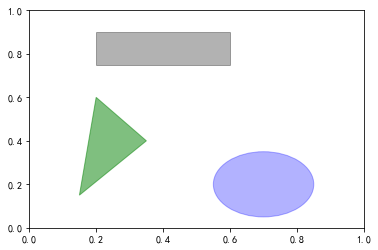

In [41]:
## 表示常见图形的对象，称为块（patch）
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 矩形：plt.Rectangle((左下方点坐标), 长, 宽, color=.., alpha=..)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color = 'k',alpha=0.3)  # 矩形，左下角点，长度，宽度
# 圆形：plt.Circle((圆心坐标), 半径, color=.., angele=.., alpha=..)
circ = plt.Circle((0.7,0.2),0.15,color = 'b',alpha=0.3)  
# 多边形：plt.Polygon(([point-1], [point-2], [point-3], ...))
# 多边形顶点连接：point-1 --> point-2 --> point-3 --> point-4 --> point-1
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 将图片保存到文件
plt.savefig('figpath.svg')

# dpi:控制 每英寸点数 分辨率  bbox_inches: 剪除当前图表周围的空白部分
plt.savefig('figpath.png',dpi=400,bbox_inches='tight') 

# matplotlib配置

In [40]:
# 操作matplotlib配置系统的方式有两种：1. 利用rc方法，比如 将全局图像默认大小设置为10*10
plt.rc('figure',figsize=(10,10))

<Figure size 432x288 with 0 Axes>

In [51]:
# rc的第一个参数是希望自定义的对象，如‘figure’、‘axes’、'xtick'、‘ytick’、‘grid’、'legend'
# 可以将这些选项也称一个字典
font_options = {'family':'monospace',
               'weight':'bold',
                'size':10}  # size:大小点数，是整型
plt.rc('font',**font_options)

# pandas中的绘图函数

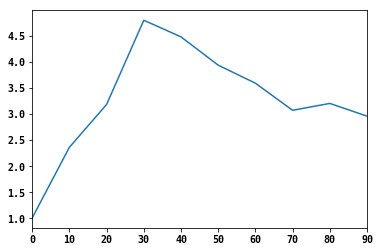

In [58]:
## 线型图
# Series和DataFrame都有一个用于生产类图表的plot方法，默认情况下，它们生成的都是线型图
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))  # 用于绘制X轴，可用use_index=False禁用该功能
s.plot(xlim=[0,90])


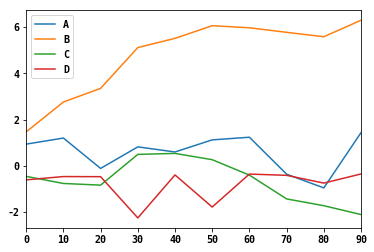

In [60]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),index =np.arange(0,100,10),columns=['A','B','C','D'])
df.plot(xlim=[0,90])

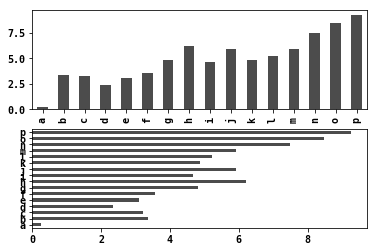

In [61]:
# 柱状图 kind='bar'(垂直柱状图) 或 kind='barh'(水平柱状图)
fig ,axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16).cumsum(),index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

In [74]:
df = pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,0.851288,0.577173,0.834442,0.282045
two,0.015899,0.967026,0.245625,0.887740
three,0.360993,0.655213,0.773883,0.570043
four,0.658353,0.746031,0.112580,0.274370
five,0.875862,0.999317,0.834123,0.529921
six,0.170252,0.498806,0.902203,0.382110


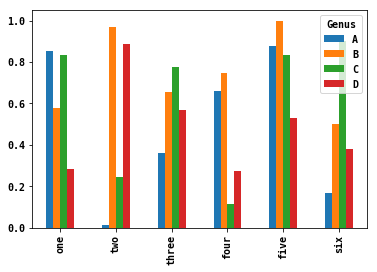

In [75]:
# 主柱状图会将每行的值分为一组，各列对名称‘Genus’被用作图例的标题
df.plot(kind='bar')

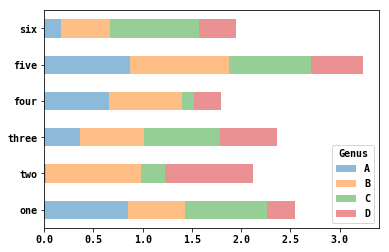

In [76]:
# stacked=True 可为DataFrame生成堆积柱状图
df.plot(kind='barh',stacked=True,alpha=0.5)

In [169]:
# 小费的数据集，做一张堆积柱状图，表示每天各种聚会规模的数据点的百分比
filename=path+'/datasets/ch08_data/tips.csv'
tips = pd.read_csv(filename,engine='python')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [91]:
party_counts = pd.crosstab(tips['day'],tips['size'])  # 因为列名size和Dataframe自带属性重名,所以不能用tips.size
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [93]:
# 1个人和6个人的聚会都比较少 所以去掉 这两列
party_counts = party_counts.ix[:,2:5] # 列名2:5
party_counts

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [110]:
# 使各行的和为1 （必须转换为浮点数，避免整数除法问题）
party_pcts = party_counts.div(party_counts.cumsum(1).astype(float),axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,1.0,0.058824,0.055556,0.000000
Sat,1.0,0.253521,0.154762,0.011765
Sun,1.0,0.277778,0.250000,0.040000
Thur,1.0,0.076923,0.087719,0.017241


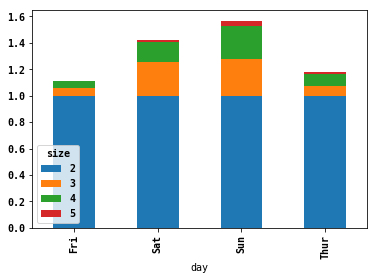

In [97]:
party_pcts.plot(kind='bar',stacked=True)

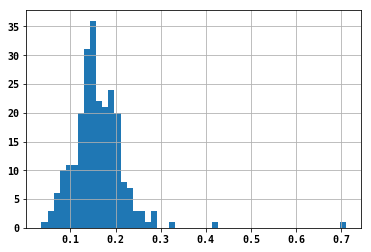

In [111]:
# 直方图（histogram）和密度图
# 直方图是可以对值频率进行离散化显示的柱状图，数据点被拆分到离散的、间距均匀的面元中，绘制的是各面元中数据点的数量
# 生成一张 小费占总额的百分比
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)


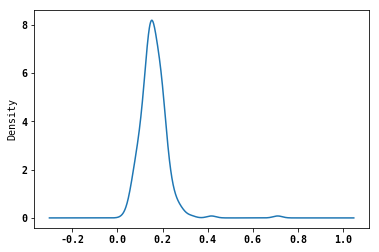

In [112]:
# 密度图是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的
# 密度图被称为KDE（Kernel Density Estimate,核密度估计），调用时加kind=‘kde’即可生成一张密度图
tips['tip_pct'].plot(kind='kde')

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


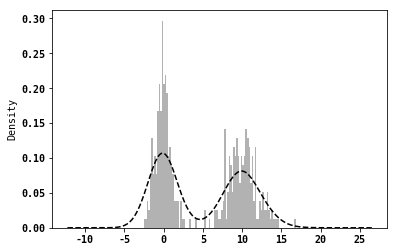

In [113]:
# 两种图表画一起
comp1 = np.random.normal(0,1,size=200)  # N(0,1)
comp2 = np.random.normal(10,2,size=200) # N(10,4)
values = pd.Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,alpha=0.3,color='k',normed=True)
values.plot(kind='kde',style='k--')

In [114]:
# 散布图 scatter plot  是 观察两个一维数据序列之间的关系的有效手段
filename=path+'/datasets/ch08_data/macrodata.csv'
macro = pd.read_csv(filename,engine='python')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

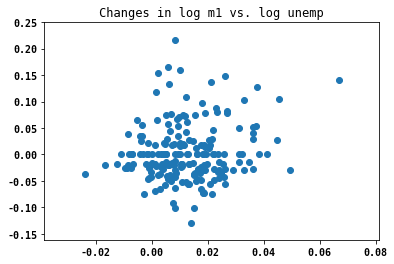

In [115]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1','unemp'))

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF19A0EFD0>,
      dtype=object)

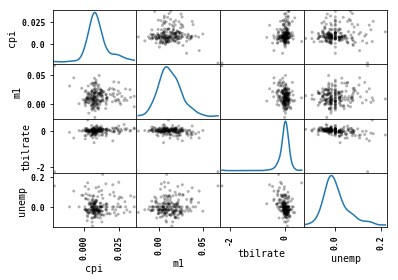

In [116]:
# pandas提供一个能从DataFrame中创建散布矩阵的scatter_matrix函数
pd.scatter_matrix(trans_data,diagonal='kde',color='k',alpha=0.3)

In [146]:
# 绘制地图：图形化显示海地地震危机数据
filename = path+'/datasets/ch08_data/Haiti.csv'
data = pd.read_csv(filename,engine='python') # 2010年海地地震及其余震期间搜集的数据
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [124]:
# 每行表示一条从某人的手机上方发送的紧急或其他问题的报告。每条报告都有一个时间戳和位置（经度和维度）
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [125]:
# CATEGORY 字段含有一组以逗号分隔的代码，这些代码表示消息的类型
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [127]:
# 可以发现有些分类信息缺失了，需丢掉这些数据点
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [147]:
# 清除错误位置信息并移除缺失分类信息
data = data[(data.LATITUDE > 18) & (data.LATITUDE <20) & (data.LONGITUDE>-75) & (data.LONGITUDE<-70 ) & data.CATEGORY.notnull()]
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [136]:
# 获取所有分类的列表
def get_all_categories(cat_series):
    cat_sets = [set(to_cat_list(x)) for x in cat_series]
    return sorted(set.union(*cat_sets))

def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(',')) # 某一条数据按逗号拆分开来
    return [x for x in stripped if x]

# 将各个分类信息拆分为编码和英语名称
def get_english(cat):
    code,names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code,names.strip()

In [132]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [137]:
# 将编码和名称映射起来的字典
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)

In [138]:
english_mapping['2a']

'Food Shortage'

In [139]:
english_mapping['6c']

'Earthquake and aftershocks'

In [140]:
# 构造一个全0的DataFrame
def get_code(seq):
    return [x.split('.')[0] for x in seq if x ]
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data),len(code_index))),index = data.index,columns=code_index)
dummy_frame[:5]

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
dummy_frame.ix[:5,:6]

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# 将各行中适当的项设置为1，再与data进行连接
for row, cat in zip(data.index,data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row,codes]=1
data = data.join(dummy_frame.add_prefix('category_'))
data.ix[:5,10:15]

D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
D:\Program Files (x86)\Asiainfo\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0


In [150]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


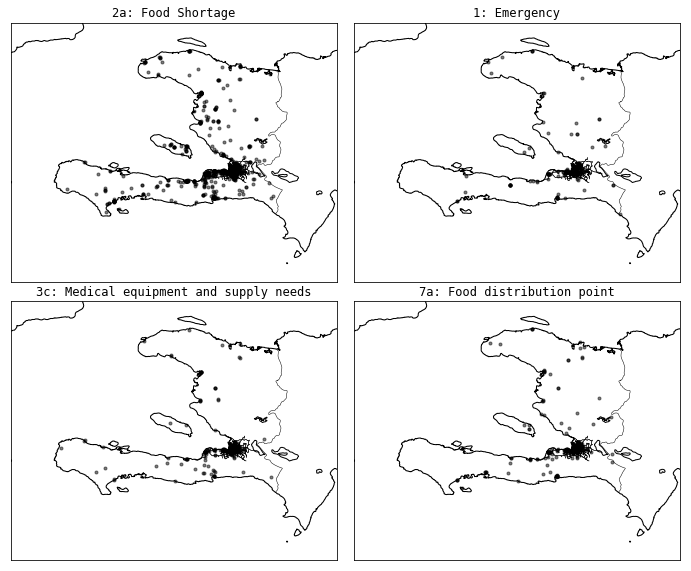

In [179]:
def basic_haiti_map(ax=None,lllat=17.25,urlat=20.25,lllon=-75,urlon=71):
    # 创建极球面投影的Basemap实例
    m = Basemap(ax=ax,projection='stere',
                lon_0=(urlon+lllon)/2,
                lat_0=(urlat+lllat)/2,
                llcrnrlat=lllat,urcrnrlat=urlat,
                llcrnrlon=lllon,urcrnrlon=urlon,
                resolution='f')
    shapefile_path=path+'/datasets/ch08_data/PortAuPrince_Roads/PortAuPrince_Roads'
    m.readshapefile(shapefile_path,'roads')
    # 绘制海岸线，州界，国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

# 让返回的basemap对象知道将坐标转换到画布上
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
fig.subplots_adjust(hspace=0.05,wspace=0.05)

to_plot=['2a','1','3c','7a']
lllat=17.25
urlat=20.25
lllon=-75
urlon=-71

for code,ax in zip(to_plot,axes.flat):
    m = basic_haiti_map(ax,lllat=lllat,urlat=urlat,lllon=lllon,urlon=urlon)
    cat_data = data[data['category_%s' % code]==1]
    
    # 计算地图的投影坐标
    x,y = m(cat_data.LONGITUDE.values,cat_data.LATITUDE.values)
    
    m.plot(x,y,'k.',alpha=0.5)
    ax.set_title('%s: %s' % (code,english_mapping[code]))
    shapefile_path=path+'/datasets/ch08_data/PortAuPrince_Roads/PortAuPrince_Roads'
    m.readshapefile(shapefile_path,'roads')

In [180]:
def basic_haiti_map(ax=None,lllat=17.25,urlat=20.25,lllon=-75,urlon=71):
    # 创建极球面投影的Basemap实例
    m = Basemap(ax=ax,projection='stere',
                lon_0=(urlon+lllon)/2,
                lat_0=(urlat+lllat)/2,
                llcrnrlat=lllat,urcrnrlat=urlat,
                llcrnrlon=lllon,urcrnrlon=urlon,
                resolution='f')
#     shapefile_path=path+'/datasets/ch08_data/PortAuPrince_Roads/PortAuPrince_Roads'
#     m.readshapefile(shapefile_path,'roads')
    # 绘制海岸线，州界，国界以及地图边界
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

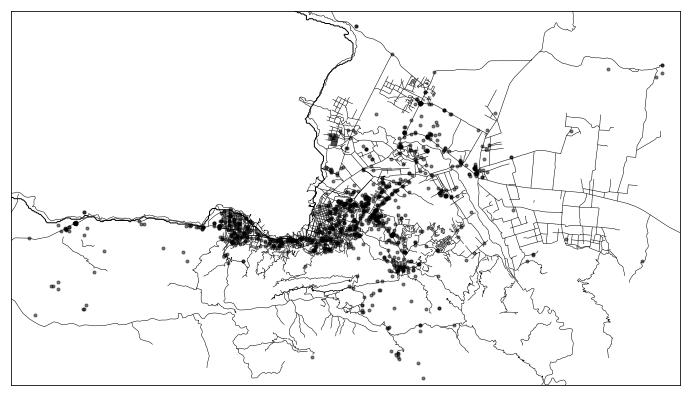

In [186]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,10))
fig.subplots_adjust(hspace=0.05,wspace=0.05)

lllat = 18.43;urlat = 18.69;lllon = -72.57;urlon = -72.08
m = basic_haiti_map(ax,lllat=lllat,urlat=urlat,lllon=lllon,urlon=urlon)

shapefile_path=path+'/datasets/ch08_data/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path,'road')

code='2a'
cat_data = data[data['category_%s' % code]==1]
# 计算地图的投影坐标
x,y = m(cat_data.LONGITUDE.values,cat_data.LATITUDE.values)
m.plot(x,y,'k.',alpha=0.5)
